# Importing Dependancies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


# Data Loading, Preprocessing & Analysis

In [2]:
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [4]:
# Check for null values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# More info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


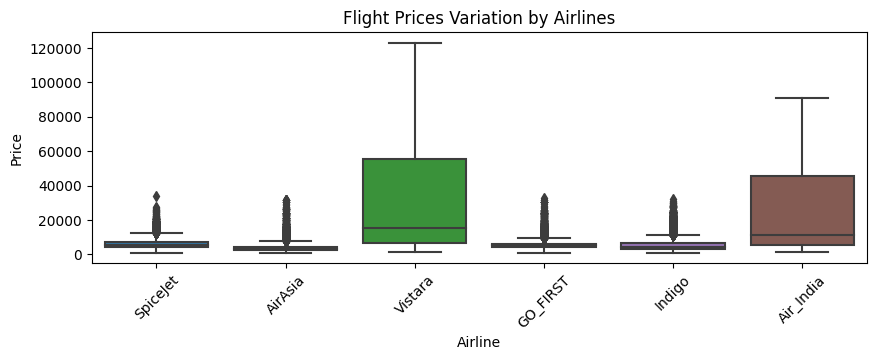

In [7]:
#Price Distribution by Airlines
plt.figure(figsize=(10, 3))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Flight Prices Variation by Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

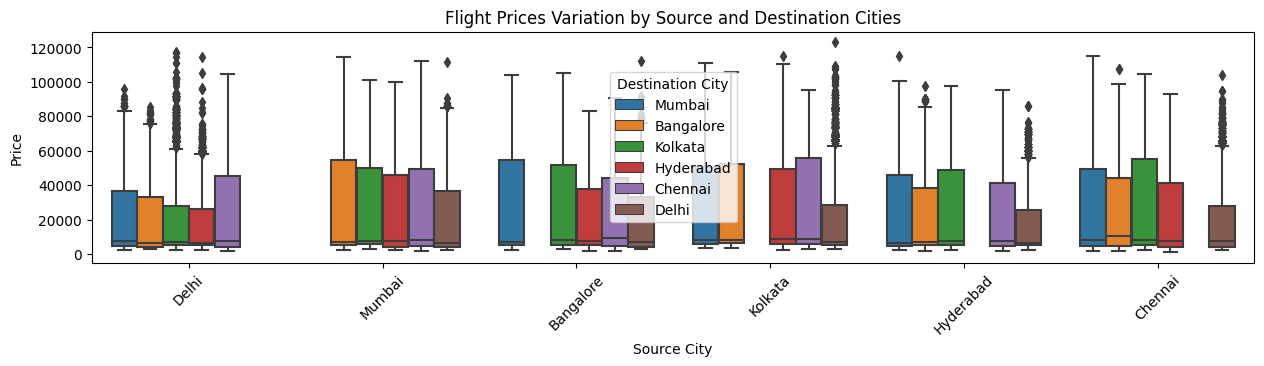

In [8]:
#Price Distribution by Source and Destination Cities
plt.figure(figsize=(15, 3))
sns.boxplot(x='source_city', y='price', data=df, hue='destination_city')
plt.title('Flight Prices Variation by Source and Destination Cities')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Destination City')
plt.show()

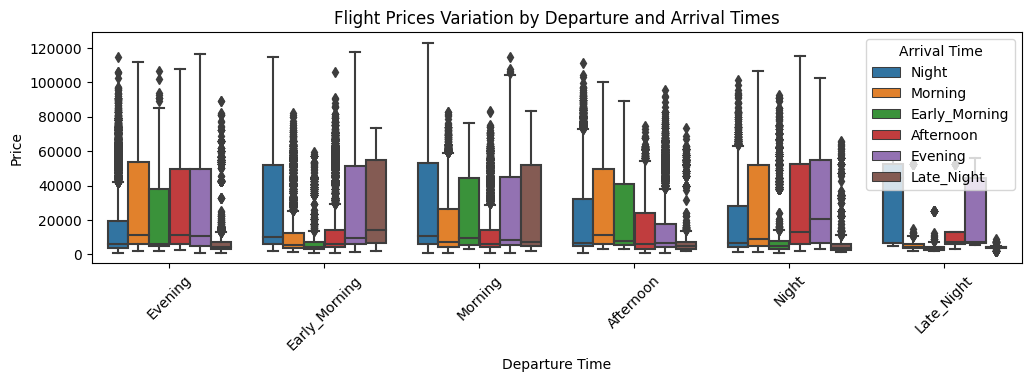

In [9]:
#Price Distribution by Departure and Arrival Times
plt.figure(figsize=(12, 3))
sns.boxplot(x='departure_time', y='price', data=df, hue='arrival_time')
plt.title('Flight Prices Variation by Departure and Arrival Times')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Arrival Time')
plt.show()

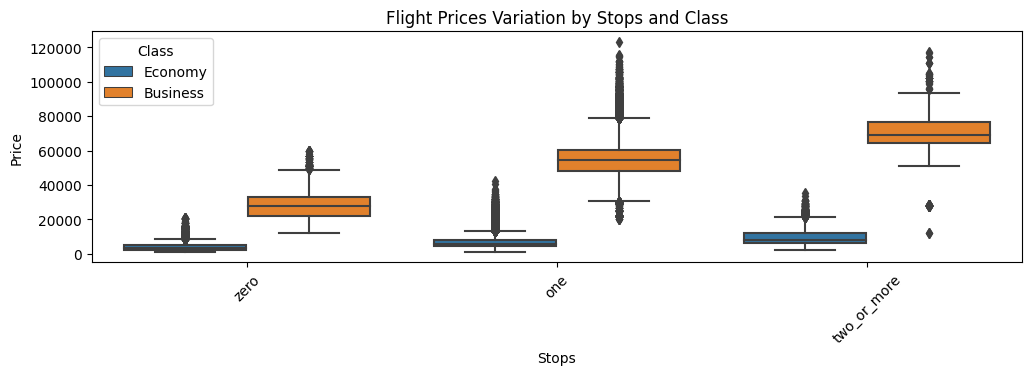

In [10]:
#Price Distribution by Stops and Class
plt.figure(figsize=(12, 3))
sns.boxplot(x='stops', y='price', data=df, hue='class')
plt.title('Flight Prices Variation by Stops and Class')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

In [11]:
# Distribution of airlines in the dataset
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [12]:
# Custom encoding for 'airline'
airline_mapping = {
    'Vistara': 0,
    'Air_India': 1,
    'Indigo': 2,
    'GO_FIRST': 3,
    'AirAsia': 4,
    'SpiceJet': 5
}
df['airline'] = df['airline'].map(airline_mapping)

In [13]:
# Distribution of source_city
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [14]:
# Custom encoding for 'source_city'
source_city_mapping = {
    'Delhi': 0,
    'Mumbai': 1,
    'Bangalore': 2,
    'Kolkata': 3,
    'Hyderabad': 4,
    'Chennai': 5
}
df['source_city'] = df['source_city'].map(source_city_mapping)

In [15]:
# Distribution of destination_city
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [16]:
# Custom encoding for 'destination_city'
destination_city_mapping = {
    'Delhi': 0,
    'Mumbai': 1,
    'Bangalore': 2,
    'Kolkata': 3,
    'Hyderabad': 4,
    'Chennai': 5
}
df['destination_city'] = df['destination_city'].map(destination_city_mapping)

In [17]:
# Distribution of departure_time
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [18]:
# Custom encoding for 'departure_time'
departure_time_mapping = {
    'Morning': 0,
    'Early_Morning': 1,
    'Evening': 2,
    'Night': 3,
    'Afternoon': 4,
    'Late_Night': 5
}
df['departure_time'] = df['departure_time'].map(departure_time_mapping)

In [19]:
# Distribution of arrival_time
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [20]:
# Custom encoding for 'arrival_time'
arrival_time_mapping = {
    'Morning': 0,
    'Early_Morning': 1,
    'Evening': 2,
    'Night': 3,
    'Afternoon': 4,
    'Late_Night': 5
}
df['arrival_time'] = df['arrival_time'].map(arrival_time_mapping)

In [21]:
# Distribution of stops
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [22]:
# Custom encoding for 'stops'
stops_mapping = {
    'one': 1,
    'zero': 0,
    'two_or_more': 2
}
df['stops'] = df['stops'].map(stops_mapping)

In [23]:
# Distribution of Class
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [24]:
# Custom encoding for 'class'
class_mapping = {
    'Economy': 0,
    'Business': 1
}
df['class'] = df['class'].map(class_mapping)

In [25]:
# Describe Basic Statistics
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,1.153072,2.201487,1.794901,0.924312,2.229656,2.274104,0.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.398106,1.437956,1.682563,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,11.250000,26.000000,7425.000000
75%,2.000000,4.000000,3.000000,1.000000,3.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


In [26]:
# Drop the 'flight' column
df = df.drop(columns=['flight'])

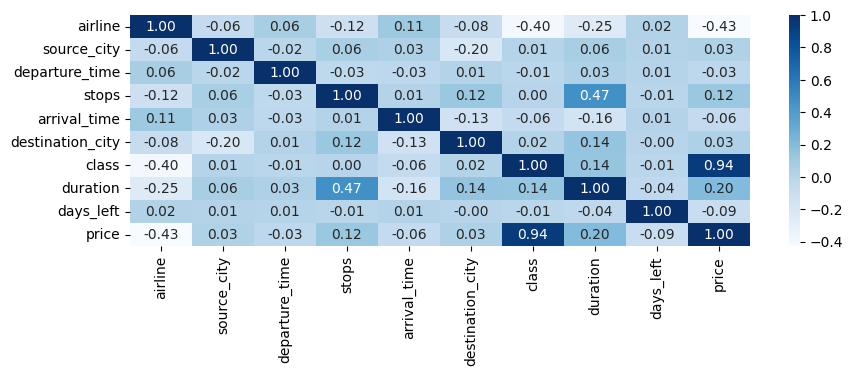

In [27]:
# Plot correlations
plt.figure(figsize=(10, 3))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


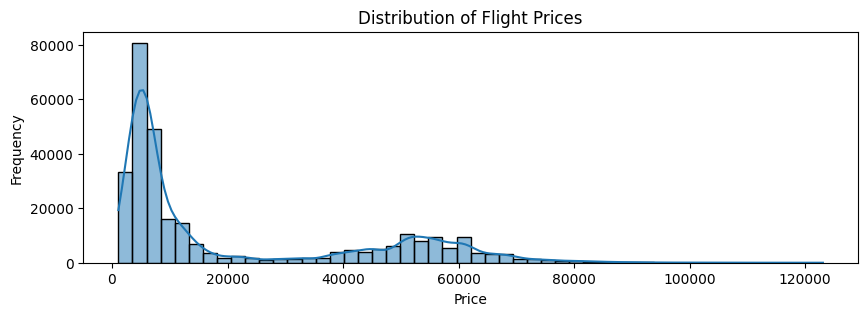

In [28]:
# Plot distribution of flight prices
plt.figure(figsize=(10, 3))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Separate features and target
X = df.drop(columns=['price'])
y = df['price']

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Random Forest Regression Model

In [32]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [33]:
# Make predictions
y_pred = model.predict(X_test)
# Model Evaluation
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9849570304760824


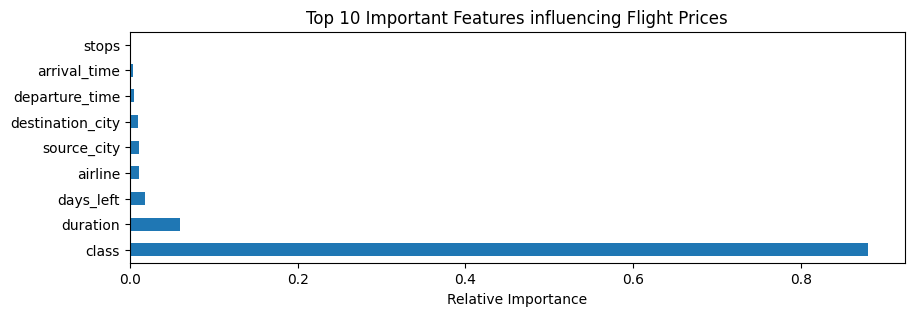

In [34]:
# Feature importance plot
plt.figure(figsize=(10, 3))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features influencing Flight Prices')
plt.xlabel('Relative Importance')
plt.show()

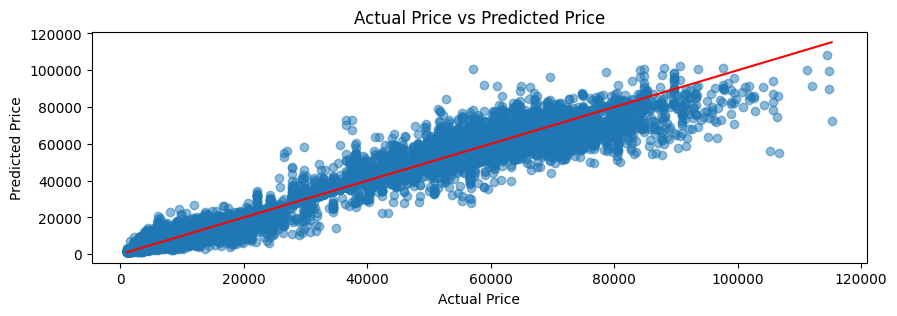

In [35]:
# Scatter Plot between Predicted and Actual Prices
plt.figure(figsize=(10, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()

# Building Prediction System

In [36]:
def predict_flight_price(airline, source_city, departure_time, stops, arrival_time, destination_city, flight_class, duration, days_left):
    # Map categorical inputs to encoded values
    airline_encoded = airline_mapping.get(airline, -1)
    source_city_encoded = source_city_mapping.get(source_city, -1)
    departure_time_encoded = departure_time_mapping.get(departure_time, -1)
    stops_encoded = stops_mapping.get(stops, -1)
    arrival_time_encoded = arrival_time_mapping.get(arrival_time, -1)
    destination_city_encoded = destination_city_mapping.get(destination_city, -1)
    class_encoded = class_mapping.get(flight_class, -1)
    # Check if any input is not recognized
    if -1 in (airline_encoded, source_city_encoded, departure_time_encoded, stops_encoded,
              arrival_time_encoded, destination_city_encoded, class_encoded):
        return "Invalid input"
    # Create feature array
    features = [[airline_encoded, source_city_encoded, departure_time_encoded, stops_encoded,
                 arrival_time_encoded, destination_city_encoded, class_encoded, duration, days_left]]
    # Scale the features
    features_scaled = scaler.transform(features)
    # Predict the price using the model
    predicted_price = model.predict(features_scaled)
    return predicted_price[0]

In [37]:
# Example usage of the predict_flight_price function
predicted_price = predict_flight_price('Vistara', 'Delhi', 'Morning', 'zero', 'Afternoon', 'Mumbai', 'Economy', 2.25, 1)
print(f"Predicted Price: {predicted_price}")

Predicted Price: 6723.69


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
